<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

salam:)


In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# 1.titanic survival data

In [108]:
df = pd.read_csv("titanic.csv")

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

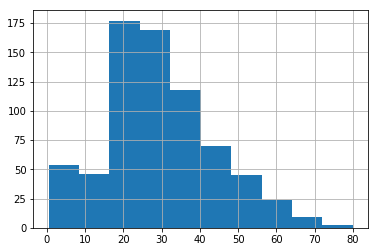

In [64]:
df['Age'].hist()

### How does the survival rate of the passengers differ between sexes?



In [115]:
df.groupby('Sex')[['Survived']].agg(['sum'])

,Survived
,sum
Sex,
female,233
male,109


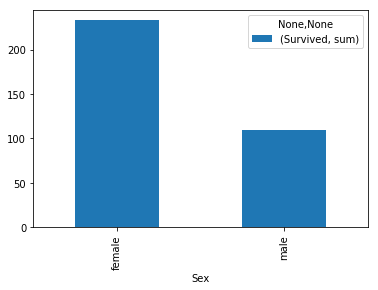

In [119]:
df.groupby('Sex')[['Survived']].agg(['sum']).plot(kind='bar')

### What is agg?

In [44]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                    [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
print(df)
# Aggregate these functions over the rows.
print(df.agg(['sum', 'min']))

# Aggregate over the columns.
print(df.agg("mean", axis="columns"))

# Aggregate over the rows.
print(df.agg("mean", axis="rows"))


     A    B    C
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
3  NaN  NaN  NaN
        A     B     C
sum  12.0  15.0  18.0
min   1.0   2.0   3.0
0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64
A    4.0
B    5.0
C    6.0
dtype: float64


# 2. air quality measurement timeseries
AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [122]:
data = pd.read_csv('20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [76]:
data.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

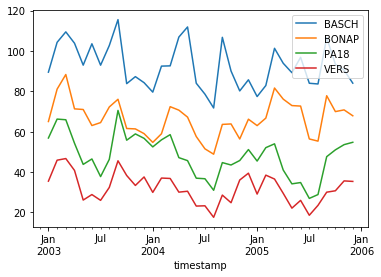

In [127]:
data['2003':'2005'].resample('M').mean().plot()

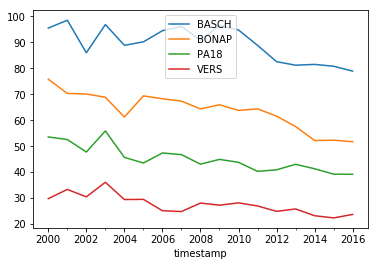

In [86]:
data['1999':].resample('A').mean().plot()

In [102]:
data.head()

,BASCH,BONAP,PA18,VERS,weekday,weekend
timestamp,,,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0,5,True
2000-01-01 02:00:00,104.0,60.0,77.0,42.0,5,True
2000-01-01 03:00:00,97.0,58.0,73.0,34.0,5,True
2000-01-01 04:00:00,77.0,52.0,57.0,29.0,5,True
2000-01-01 05:00:00,79.0,52.0,64.0,28.0,5,True


**What is the difference in diurnal profile between weekdays and weekend?**

weekend,False,True
timestamp,,
0,62.683270,77.040828
1,51.150107,68.010059
2,44.088698,59.186060
3,43.542551,53.515366
4,53.439094,53.383797


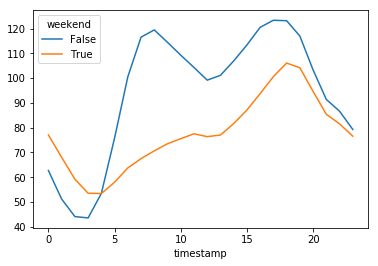

In [132]:
# create column weekday
data['weekday'] = data.index.weekday
# create column weekend
data['weekend'] = data['weekday'].isin([5, 6])
#data.head()
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()
data_weekend.head()

In [103]:
data_weekend.head()

weekend,False,True
timestamp,,
0,62.683270,77.040828
1,51.150107,68.010059
2,44.088698,59.186060
3,43.542551,53.515366
4,53.439094,53.383797


# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [87]:
#pd.read

In [88]:
#df.to

Very powerful csv reader:

In [89]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [91]:
df = pd.read_csv("titanic.csv")

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
no2 = pd.read_csv('20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [94]:
no2

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
...,...,...,...,...
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


# 4. Exploration

Some useful methods:

`head` and `tail`

In [41]:
no2.head(3)

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0


In [42]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


`info()`

In [43]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


Getting some basic summary statistics about the data with `describe`:

In [44]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Quickly visualizing the data

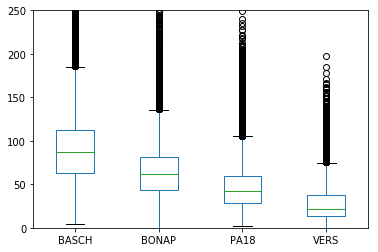

In [45]:
no2.plot(kind='box', ylim=[0,250])

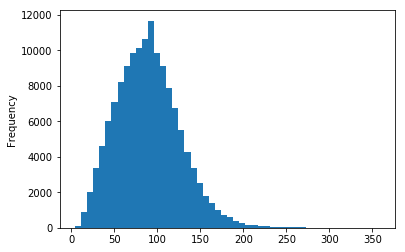

In [46]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

# 5. Selecting and filtering data

In [50]:
df = pd.read_csv("data/titanic.csv")

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [51]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

or multiple columns:

In [52]:
df[['Age', 'Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
...,...,...
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000
890,32.0,7.7500


But, slicing accesses the rows:

In [53]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [54]:
df = df.set_index('Name')

In [55]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.550000000000001

In [56]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,female,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,male,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,male,39.0,1,5,347082,31.275,NaN,S


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [57]:
df.iloc[0:2,1:3]

,Survived,Pclass
Name,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


The different indexing methods can also be used to assign data:

In [58]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [59]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [60]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, dtype: bool

In [61]:
df[df['Fare'] > 50]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S
"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,1,1,female,47.0,1,1,11751,52.5542,D35,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C


In [62]:
df = pd.read_csv("data/titanic.csv")

In [63]:
df[df['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [64]:
df.loc[df['Sex'] == 'male', 'Age'].mean()

30.72664459161148

In [65]:
df.loc[df['Sex'] == 'female', 'Age'].mean()

27.915708812260537

In [66]:
len(df[df['Age'] > 70])

5

In [67]:
(df['Age'] > 70).sum()

5

# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [68]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [69]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [70]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [71]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [72]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [73]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [74]:
df = pd.read_csv("data/titanic.csv")

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

# 7. What I didn't talk about

- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Reshaping data: `pivot_table`, `melt`, `stack`, `unstack`
- Working with missing data: `isnull`, `dropna`, `interpolate`, ...
- ...


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html